<a href="https://colab.research.google.com/github/anushanthbalachandran/ML_Coursework_Telco_Customer_Churn/blob/main/2425477_20241130_Anushanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balachandran Anushanth
# RGU_ID-2425477
# IIT_ID-20241130

In [31]:

# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Install the seaborn library silently
!pip install seaborn --quiet

In [33]:
from google.colab import drive
drive.mount('/content/drive')

plt.style.use("default")
sns.set_theme()

path = "/content/drive/MyDrive/ML_Dataset/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

inputs = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
print("Shape:", inputs.shape)

inputs.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
print("===== INFO =====")
print(inputs.info())

print("\n===== DESCRIPTIVE STATS (NUMERIC) =====")
print(inputs.describe())

print("\n====Duplicates=====")
print(inputs.duplicated().sum())

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [36]:
print("\n===== MISSING VALUES =====")
print(inputs.isnull().sum())
print(inputs.isna().sum())


===== MISSING VALUES =====
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [37]:
print("===== Blank values in every column =====")
for col in inputs.columns:
    rows = inputs[inputs[col].astype(str).str.strip() == ""]
    blanks = (inputs[col].astype(str).str.strip() == "").sum()
    print(f"{col}: {blanks}")
    if len(rows) > 0:
        print(f"\nRows with blanks in {col}:")
        display(rows)

===== Blank values in every column =====
customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows with blanks in TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [38]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print()
categorical_cols = inputs.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {inputs[col].nunique()} unique values")
    print(inputs[col].unique())
    print()
    print(inputs[col].value_counts())
    print()
    print()


Unique Values in Categorical Columns:

customerID: 7043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


gender: 2 unique values
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: 2 unique values
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: 2 unique values
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: 2 unique values
['No' 'Yes']

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetServ

In [39]:
# Count of 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (inputs[col] == 'unknown').sum()
    total_count = len(inputs)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: customerID
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: gender
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Partner
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Dependents
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: PhoneService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: MultipleLines
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: InternetService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineSecurity
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineBackup
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: DeviceProtection
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: TechSupport
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingTV
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingMovies
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Contract



Target Variable Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


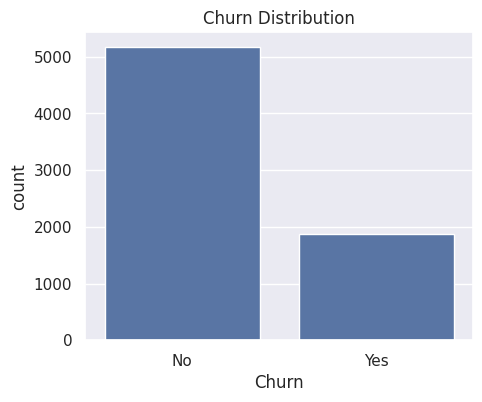

In [40]:
# Value counts for the target variable
print("\nTarget Variable Distribution:")
print(inputs['Churn'].value_counts())

# Value counts percentage for the target variable
print(inputs["Churn"].value_counts(normalize=True)*100)

# Churn Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=inputs, x="Churn")
plt.title("Churn Distribution")
plt.show()

In [42]:
numeric_cols = inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [c for c in inputs.columns if inputs[c].dtype == "O" and c != "customerID"]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Updated Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Updated Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [43]:
# Remove rows where ANY column contains blank string or only spaces
inputs = inputs[~inputs.apply(lambda row: row.astype(str).str.strip().eq("").any(), axis=1)].reset_index(drop=True)

print("New shape after removing blank rows:", inputs.shape)

New shape after removing blank rows: (7032, 21)


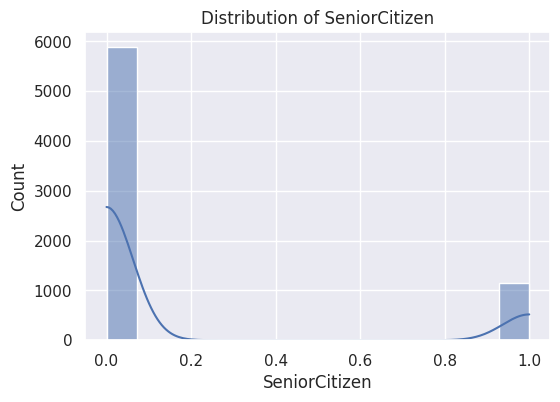

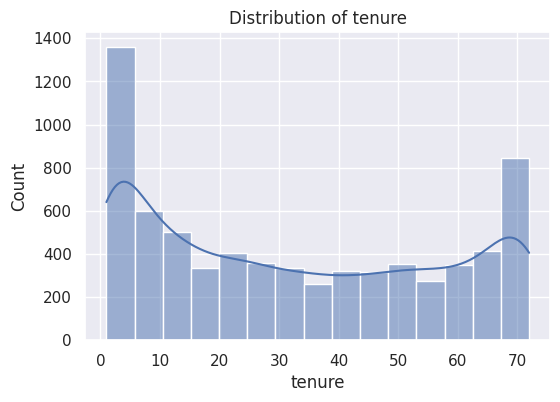

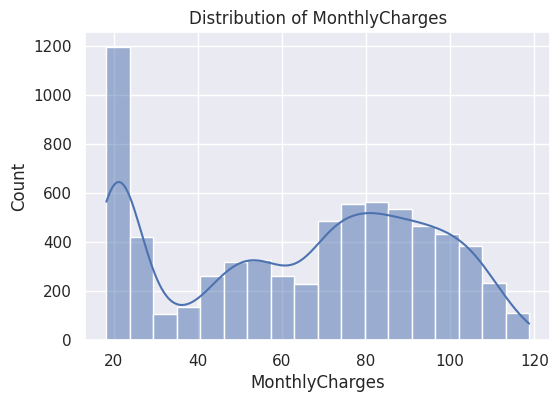

Shape: (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(inputs[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


print("Shape:", inputs.shape)
inputs.head()


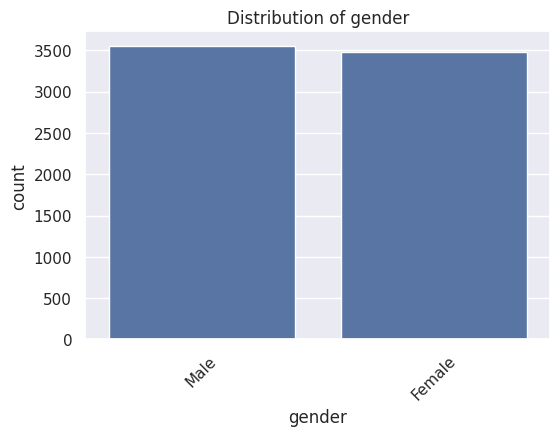

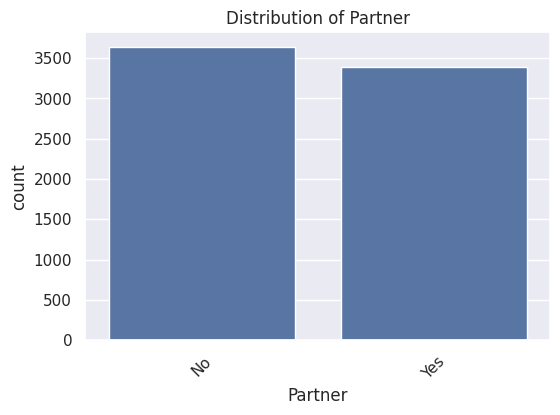

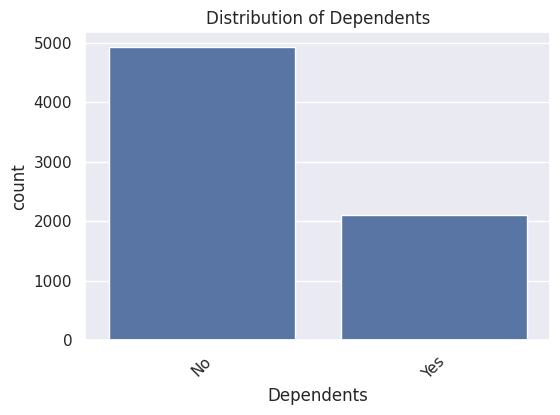

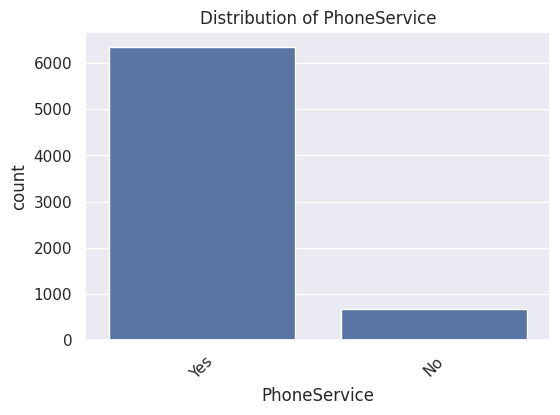

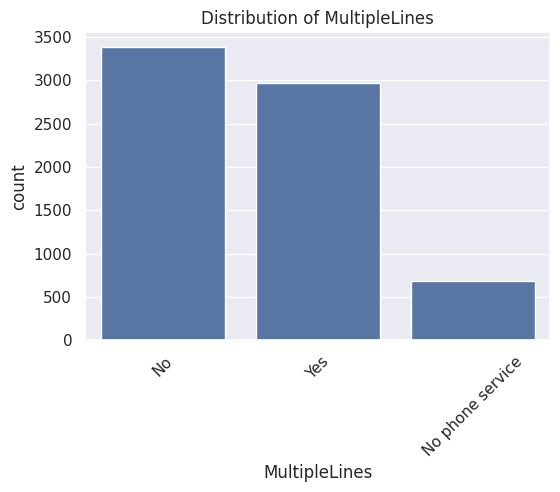

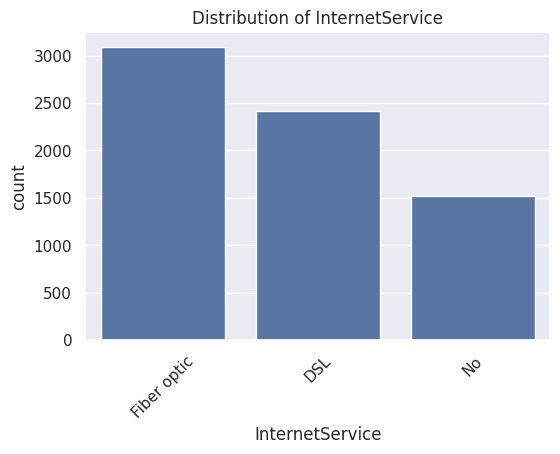

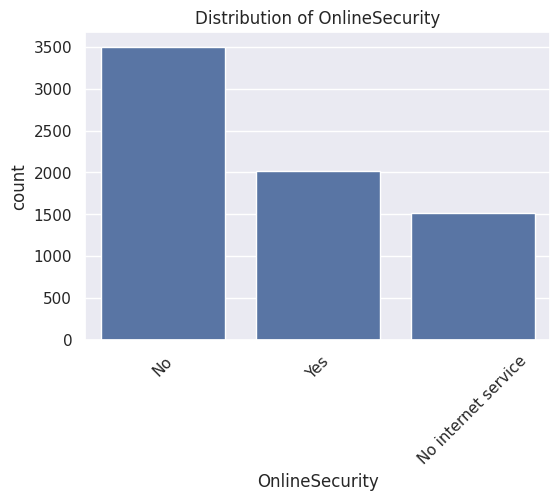

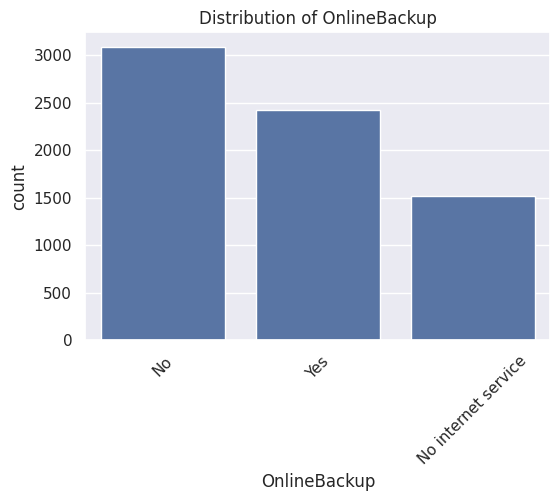

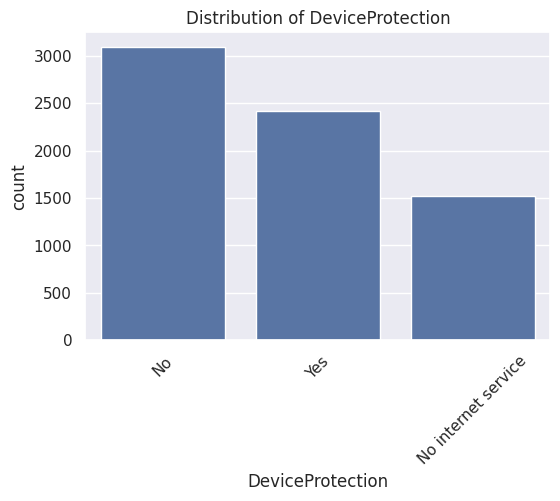

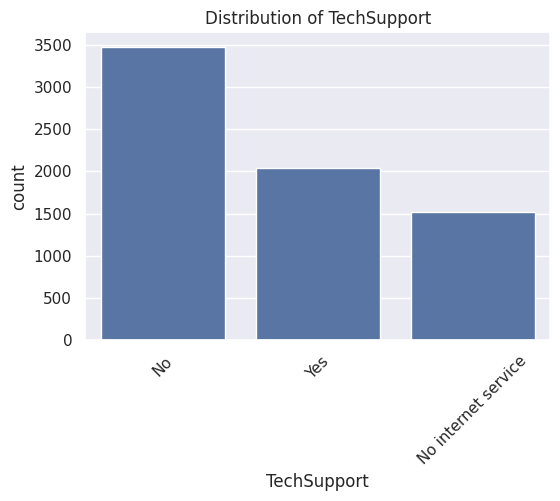

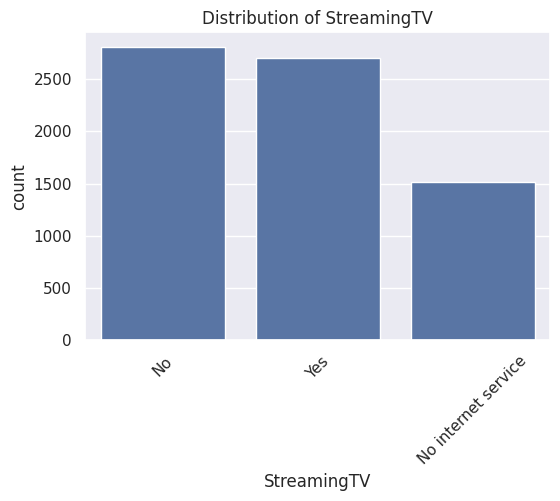

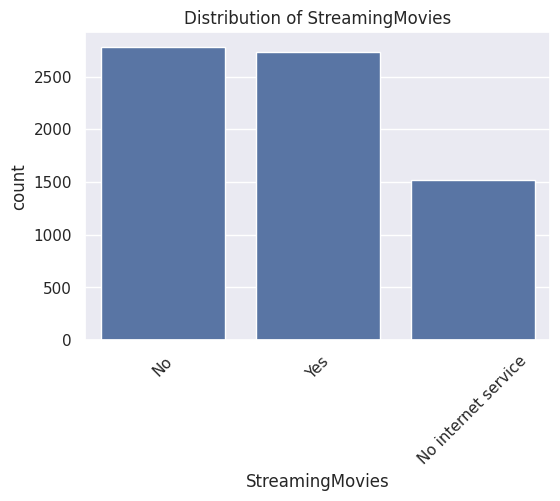

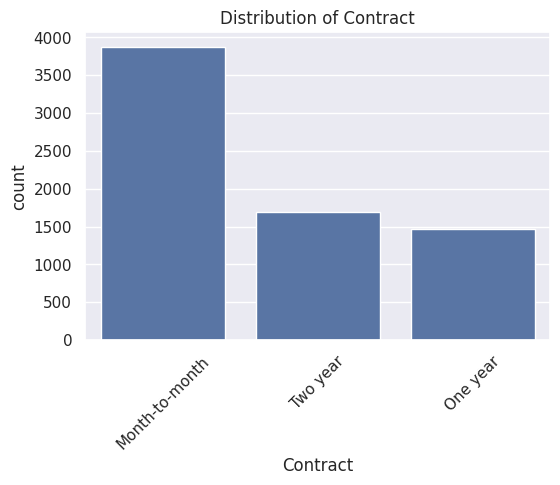

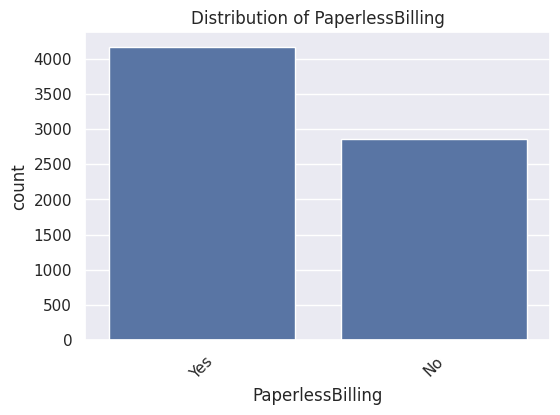

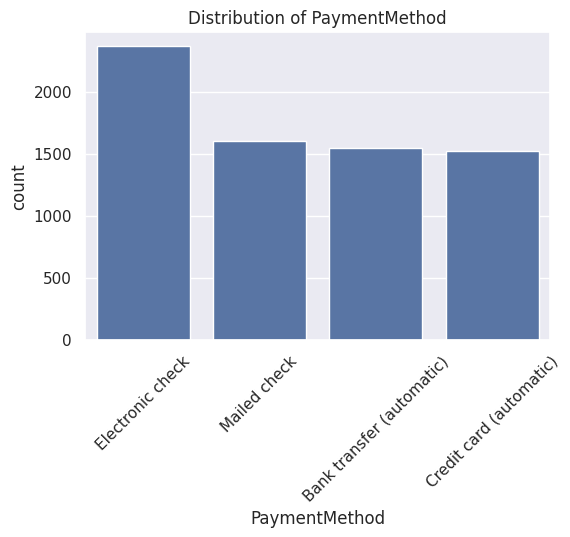

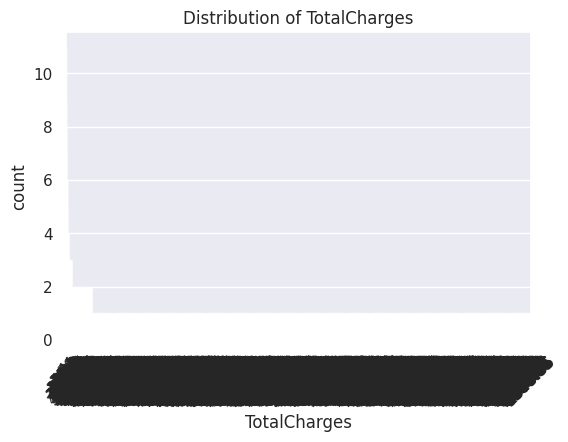

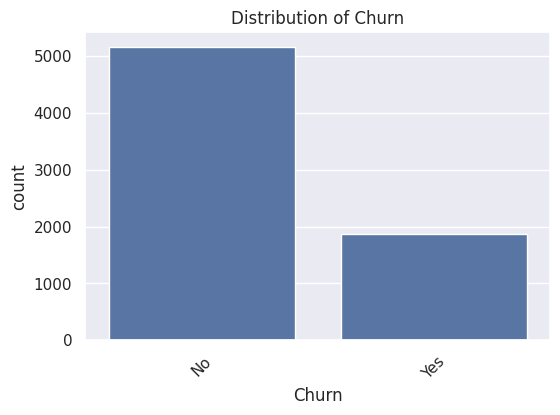

Shape: (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=inputs, x=col, order=inputs[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


print("Shape:", inputs.shape)
inputs.head()


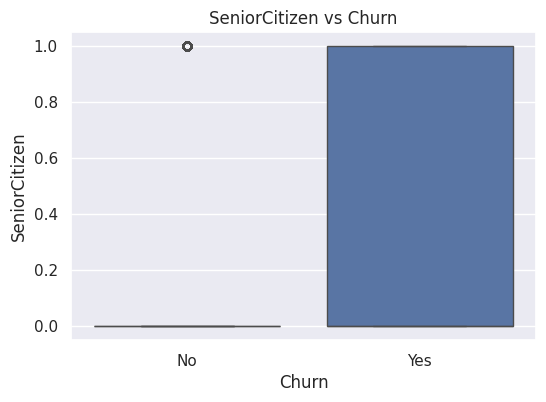

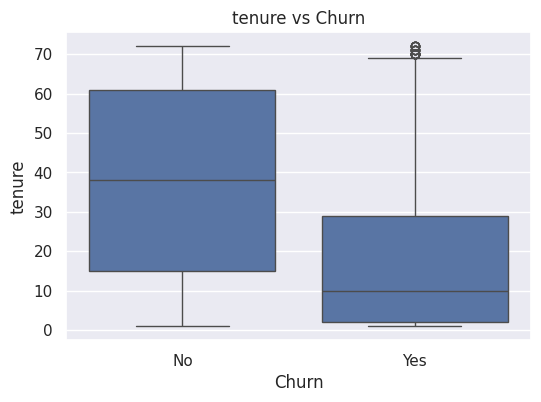

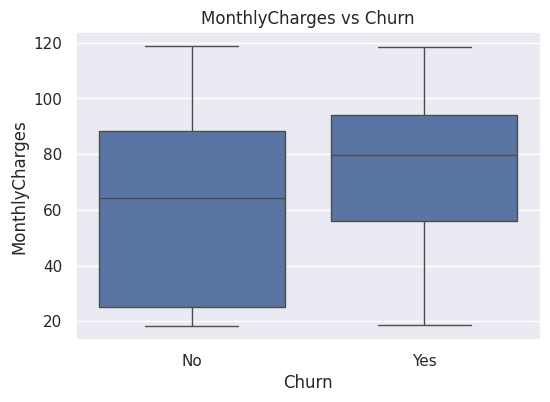

In [46]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=inputs, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


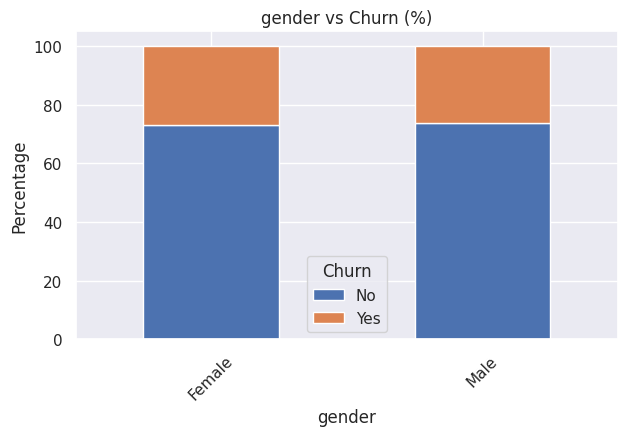

Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


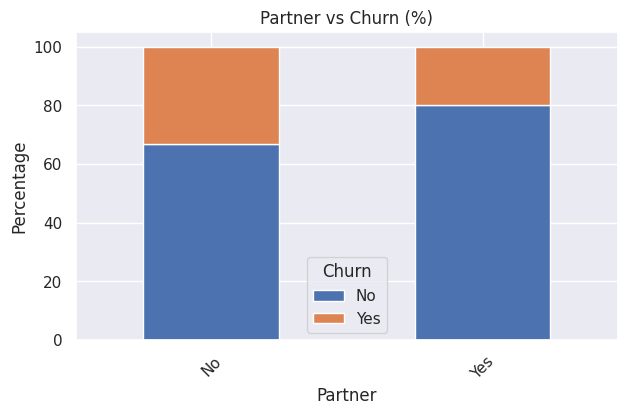

Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


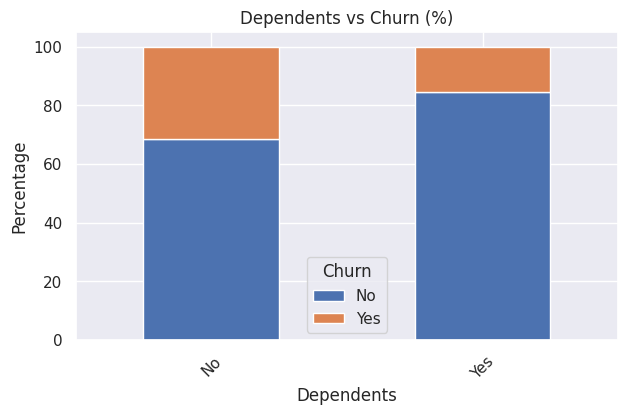

Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


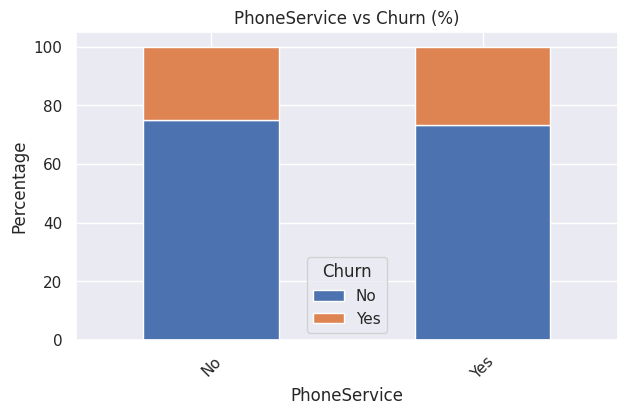

Churn                    No        Yes
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


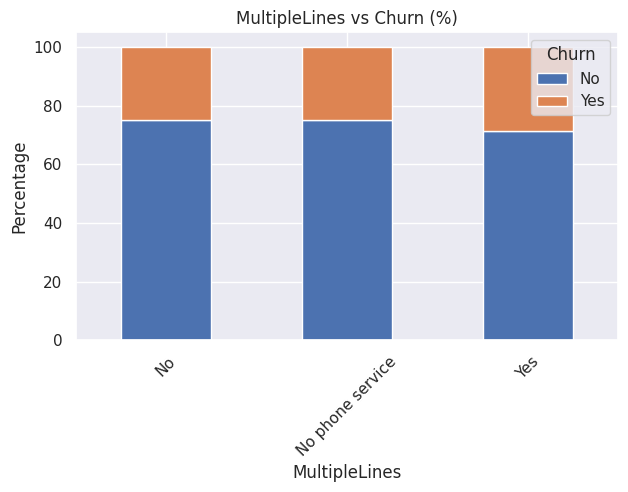

Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


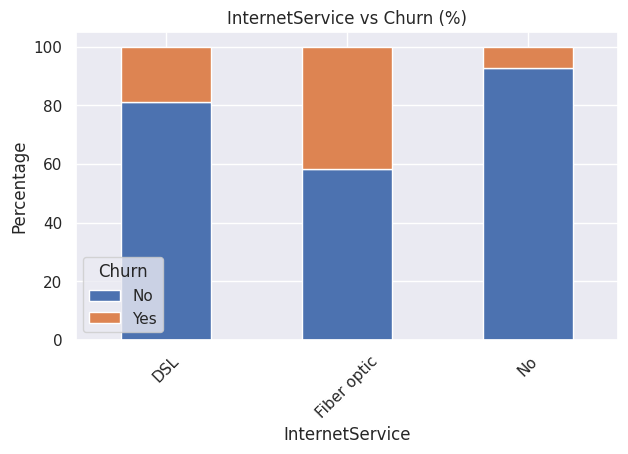

Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


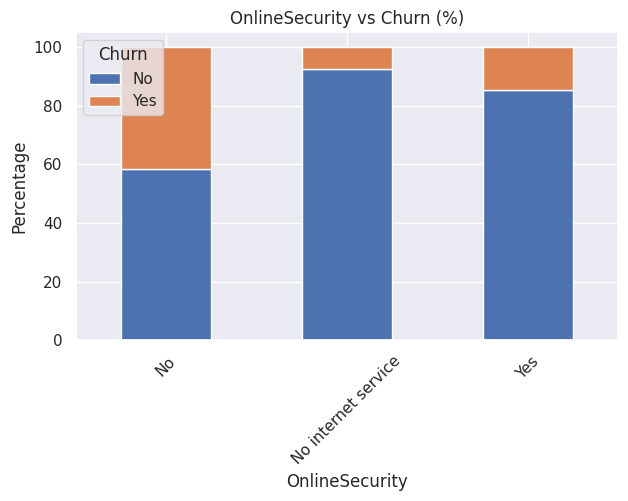

Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


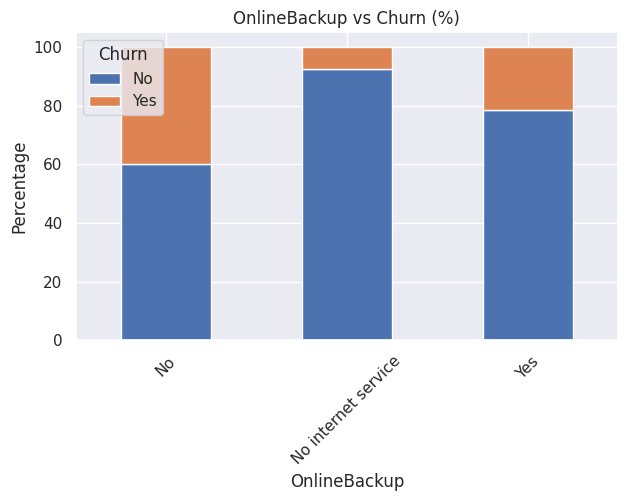

Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


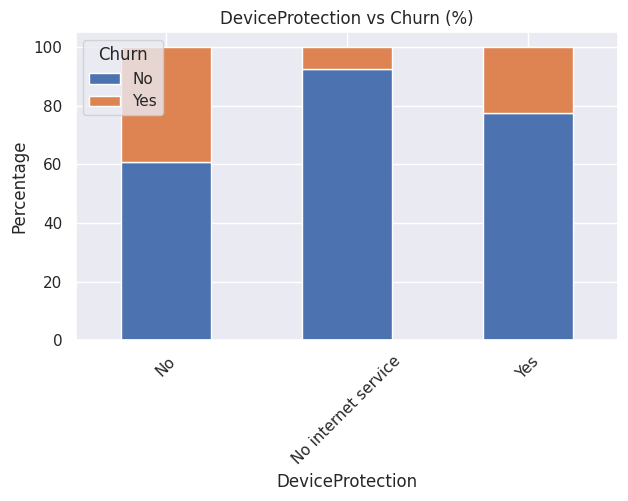

Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


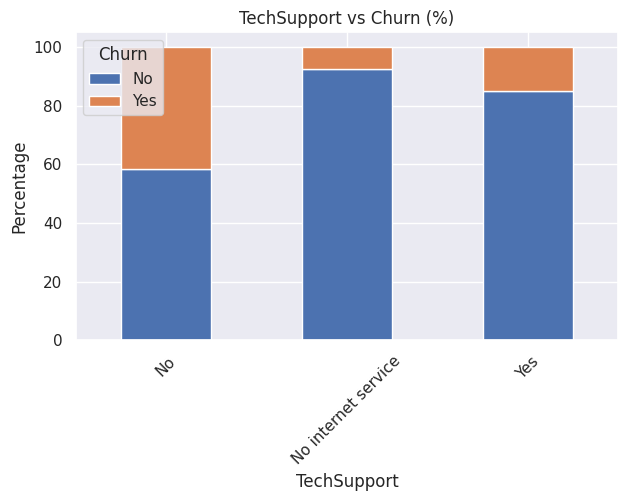

Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


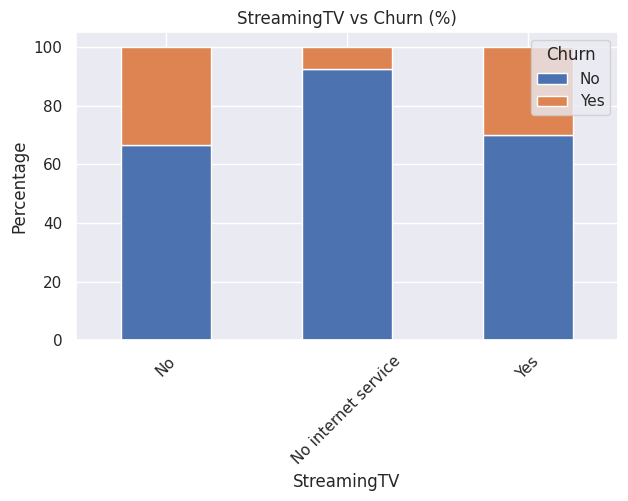

Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


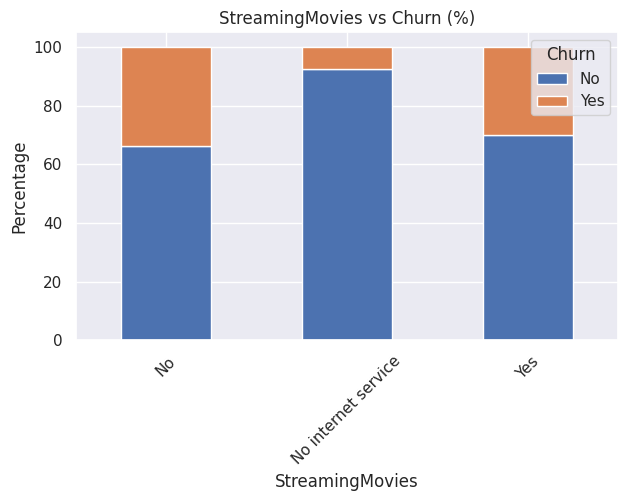

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


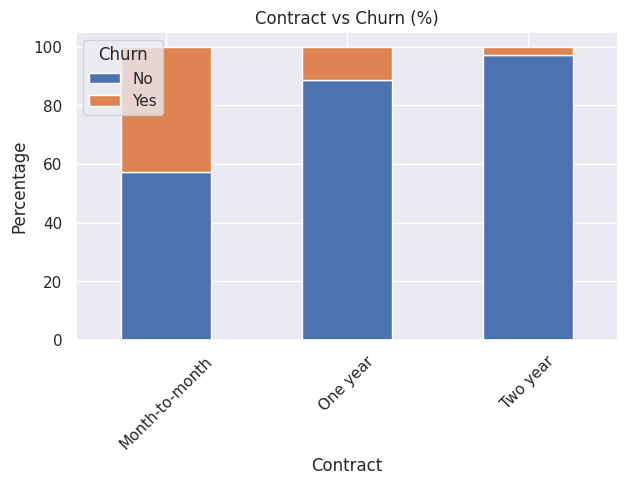

Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


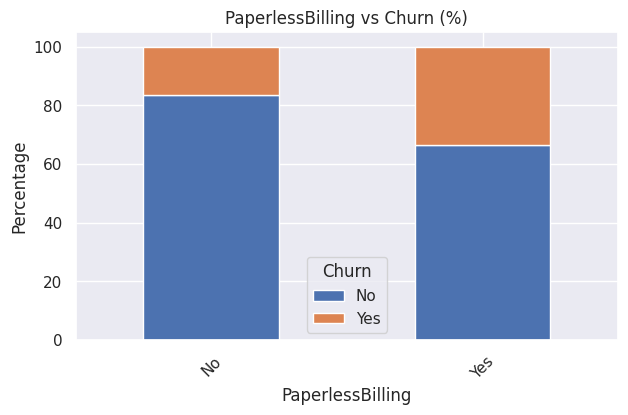

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


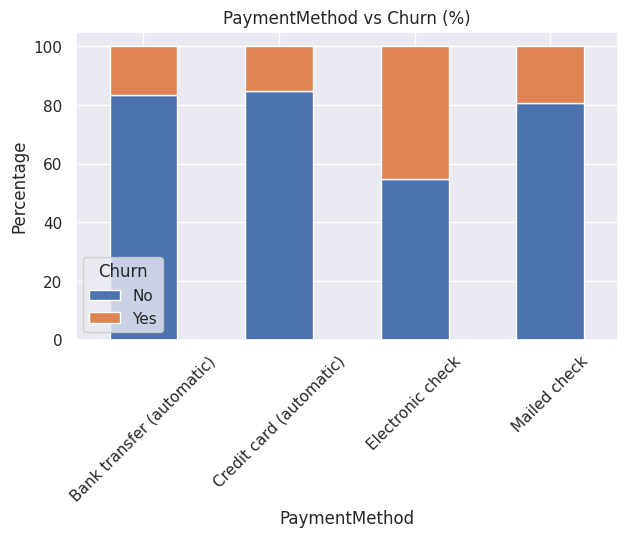

Churn            No    Yes
TotalCharges              
100.2         100.0    0.0
100.25          0.0  100.0
100.35        100.0    0.0
100.4           0.0  100.0
100.8           0.0  100.0
...             ...    ...
997.75        100.0    0.0
998.1         100.0    0.0
999.45          0.0  100.0
999.8         100.0    0.0
999.9         100.0    0.0

[6530 rows x 2 columns]


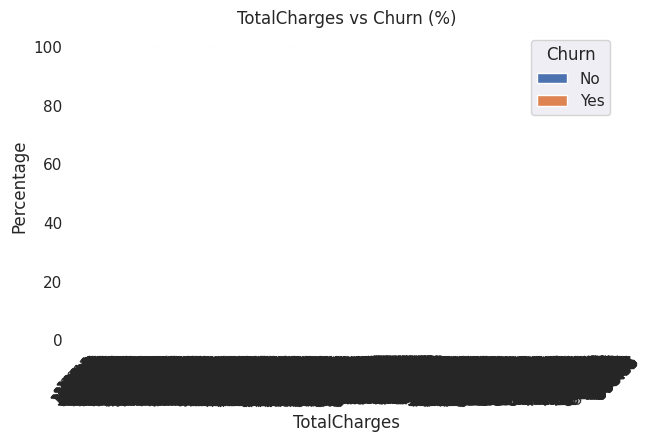

Churn     No    Yes
Churn              
No     100.0    0.0
Yes      0.0  100.0


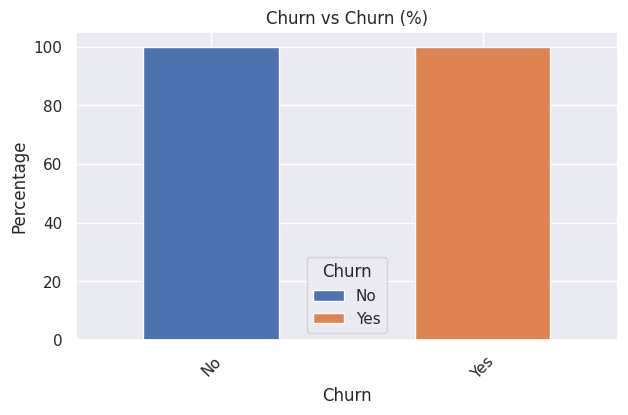

In [47]:
def plot_cat(col):
    ct = pd.crosstab(inputs[col], inputs["Churn"], normalize="index") * 100
    print(ct)

    ct.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.show()

for col in categorical_cols:
    plot_cat(col)


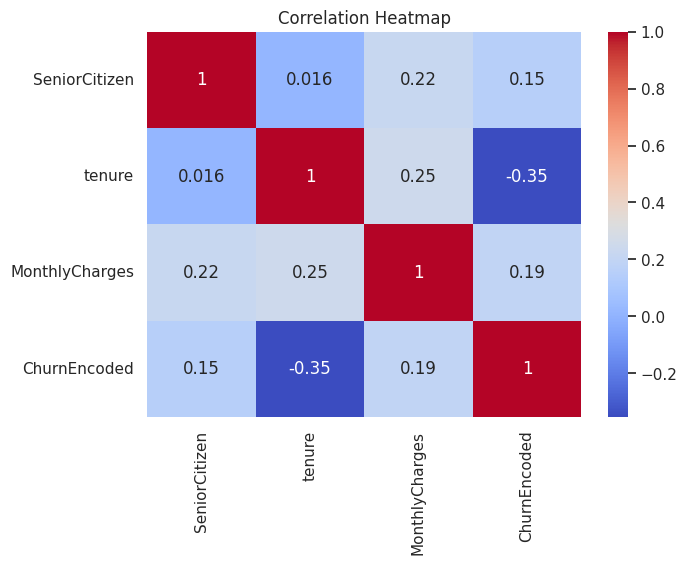

In [48]:
inputs["ChurnEncoded"] = inputs["Churn"].map({"No":0, "Yes":1})

plt.figure(figsize=(7,5))
sns.heatmap(inputs[numeric_cols + ["ChurnEncoded"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [49]:
inputs["TotalCharges"] = pd.to_numeric(inputs["TotalCharges"], errors="coerce")
inputs.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnEncoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


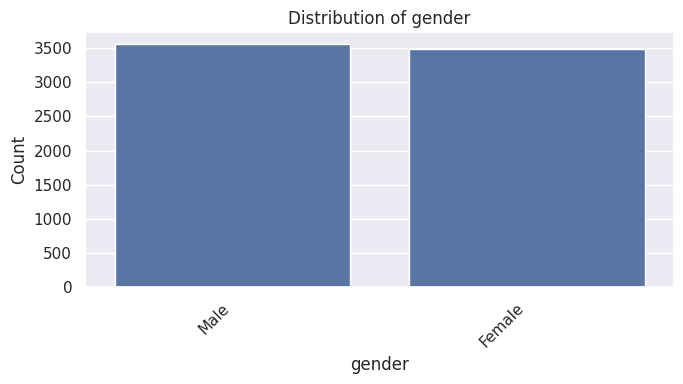

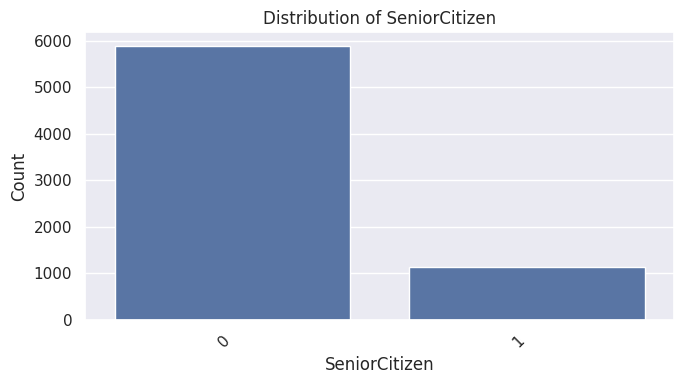

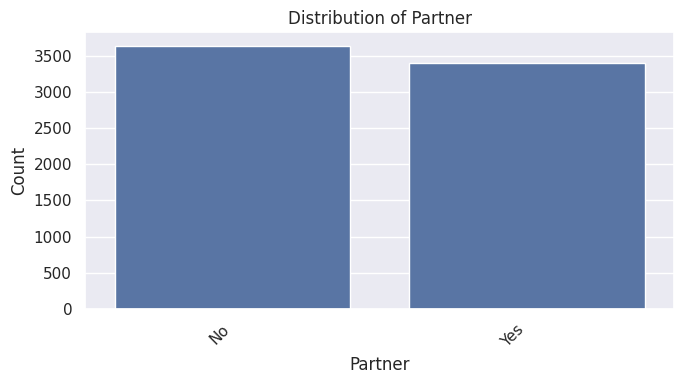

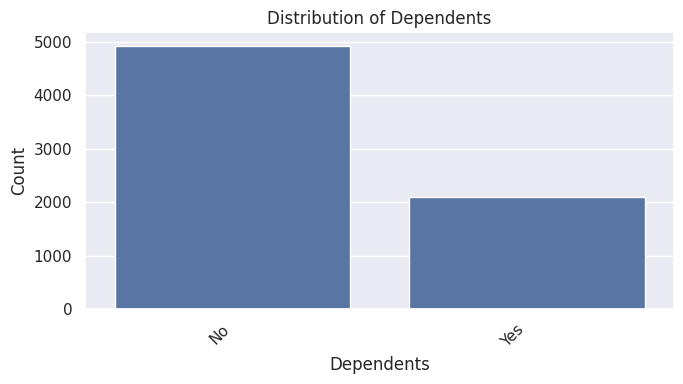

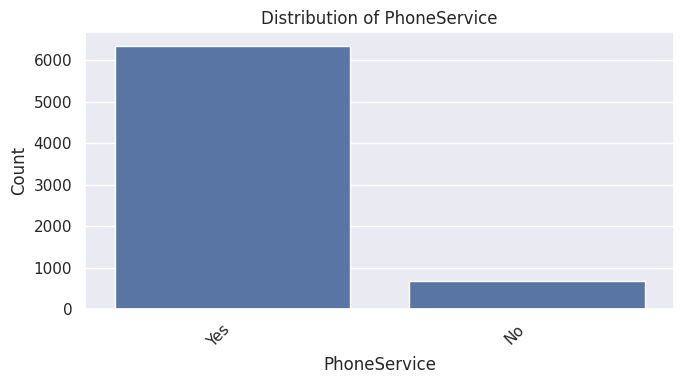

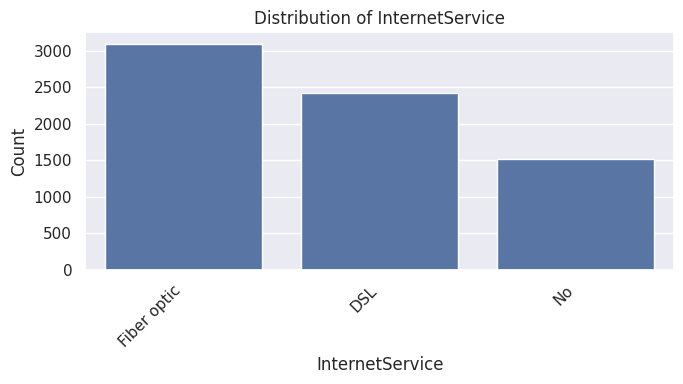

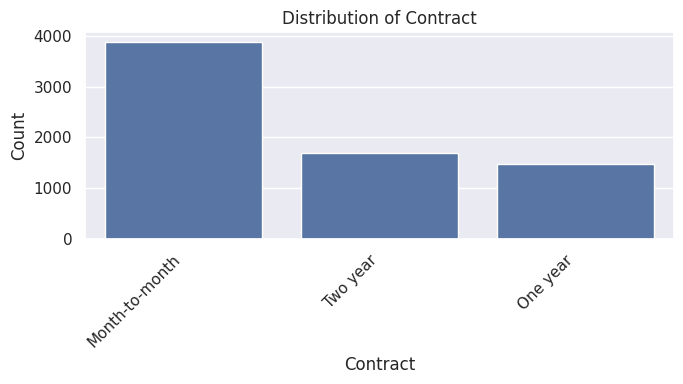

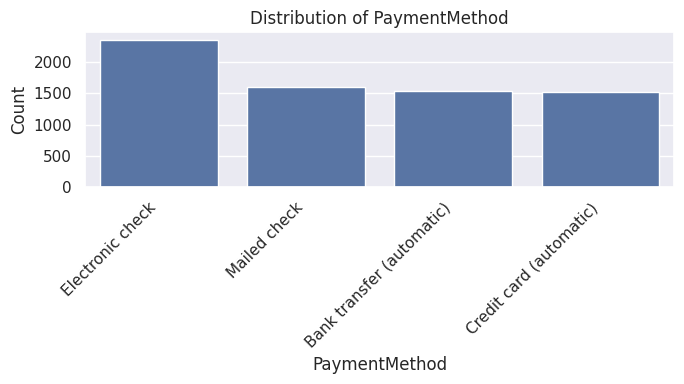

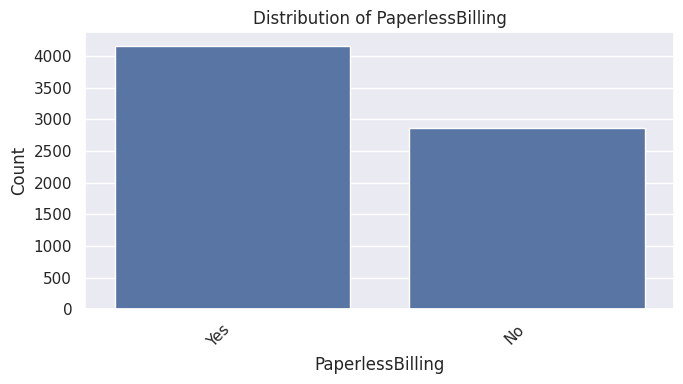

In [50]:
cat_cols = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "InternetService",
    "Contract",
    "PaymentMethod",
    "PaperlessBilling"
]

for col in cat_cols:
    plt.figure(figsize=(7,4))
    order = inputs[col].value_counts().index
    sns.countplot(data=inputs, x=col, order=order)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



Contract vs Churn (%)


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


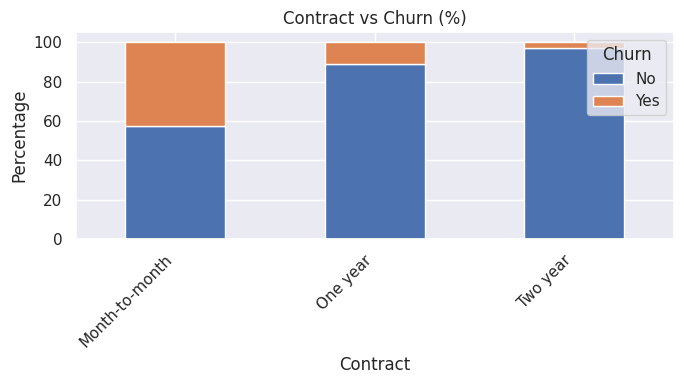


InternetService vs Churn (%)


Churn,No,Yes
InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


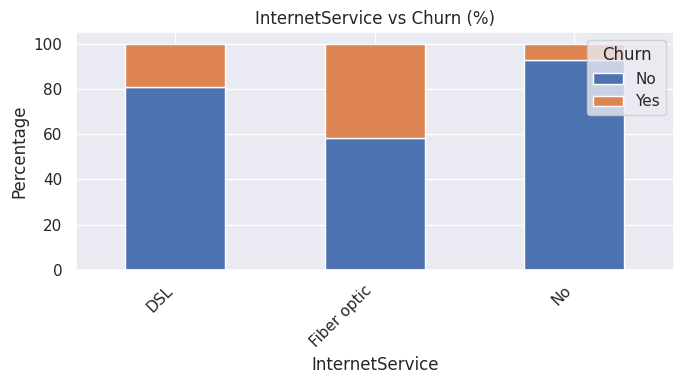


PaymentMethod vs Churn (%)


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


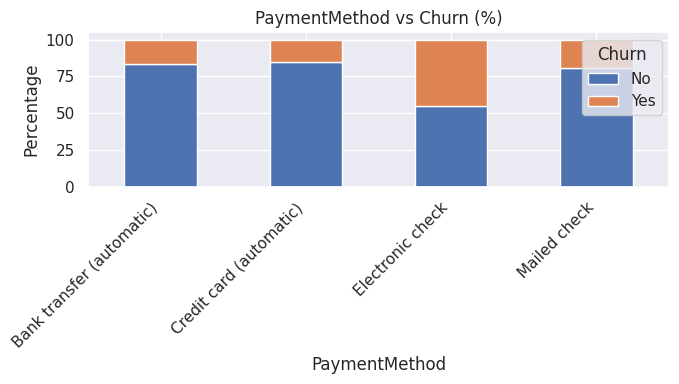


PaperlessBilling vs Churn (%)


Churn,No,Yes
PaperlessBilling,,
No,83.624302,16.375698
Yes,66.410749,33.589251


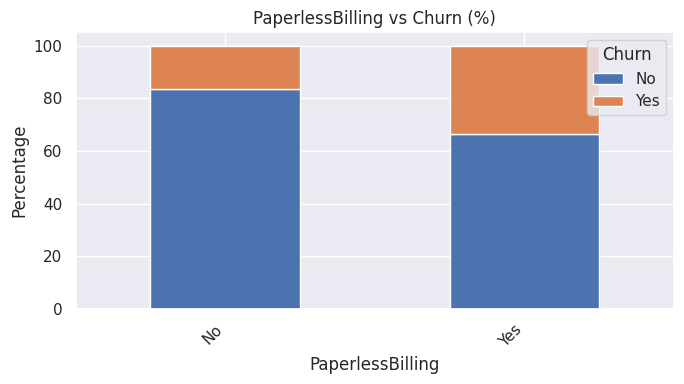

In [51]:
def plot_churn_stacked(col):
    ct = pd.crosstab(inputs[col], inputs["Churn"], normalize="index") * 100
    print(f"\n{col} vs Churn (%)")
    display(ct)

    ct.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.legend(title="Churn", loc="upper right")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for col in ["Contract", "InternetService", "PaymentMethod", "PaperlessBilling"]:
    plot_churn_stacked(col)


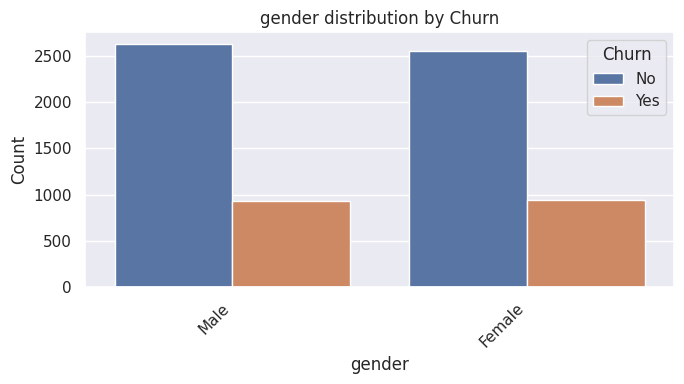

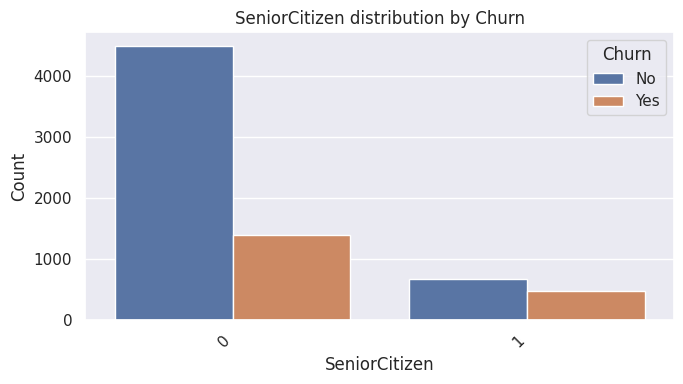

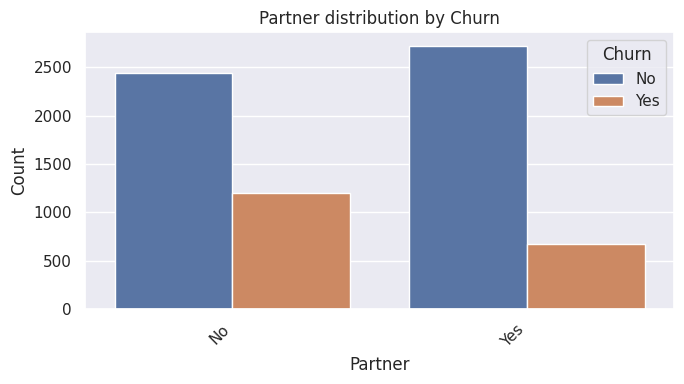

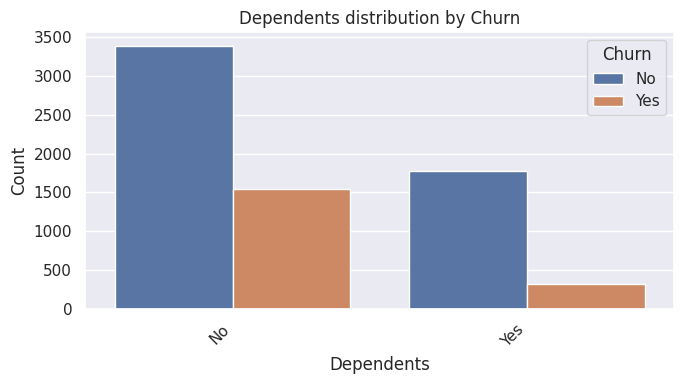

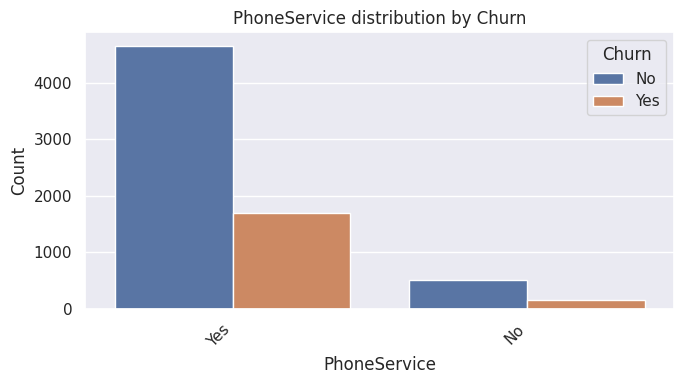

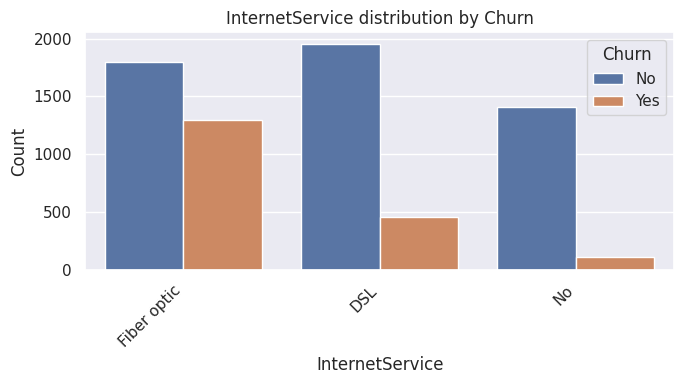

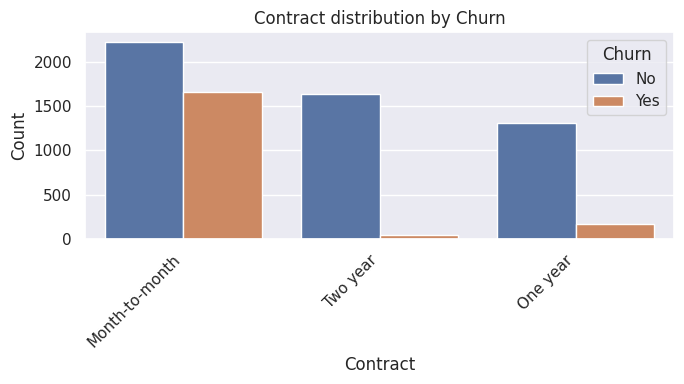

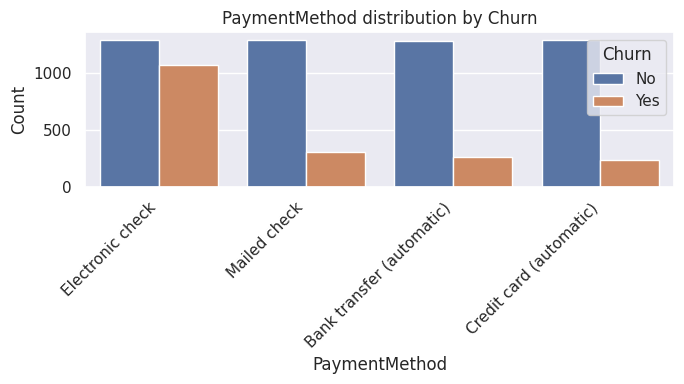

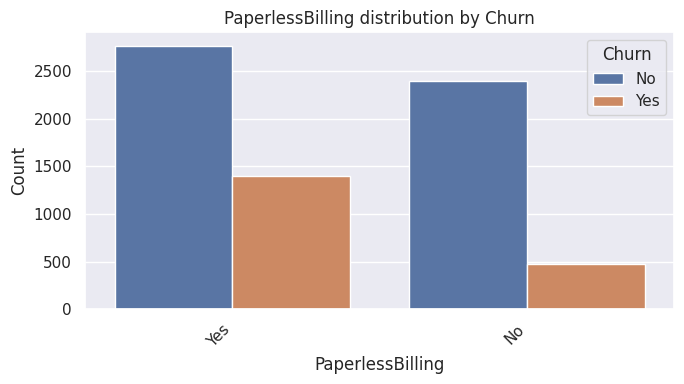

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "InternetService",
    "Contract",
    "PaymentMethod",
    "PaperlessBilling"
]

for col in cat_cols:
    plt.figure(figsize=(7,4))
    order = inputs[col].value_counts().index
    sns.countplot(data=inputs, x=col, order=order, hue="Churn")
    plt.title(f"{col} distribution by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Churn                No        Yes
tenure_group                      
0–12          52.321839  47.678161
13–24         71.289062  28.710938
25–36         78.365385  21.634615
37–48         80.971129  19.028871
49–60         85.576923  14.423077
61–72         93.390192   6.609808


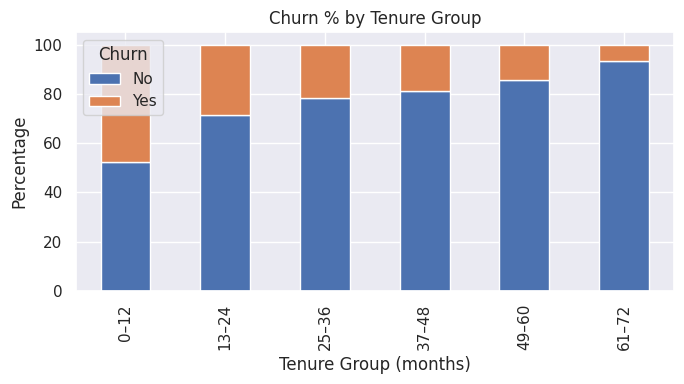

In [53]:
import pandas as pd

# Create tenure groups
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0–12", "13–24", "25–36", "37–48", "49–60", "61–72"]
inputs["tenure_group"] = pd.cut(inputs["tenure"], bins=bins, labels=labels, right=True)

# Churn rate per group
tenure_churn = pd.crosstab(inputs["tenure_group"], inputs["Churn"], normalize="index") * 100
print(tenure_churn)

tenure_churn.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn % by Tenure Group")
plt.ylabel("Percentage")
plt.xlabel("Tenure Group (months)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


Churn                No        Yes
charge_group                      
0–30          90.163934   9.836066
31–60         74.030087  25.969913
61–90         66.051196  33.948804
91–120        67.222542  32.777458


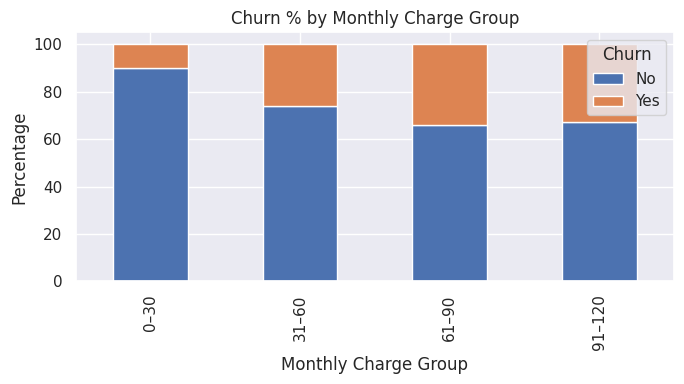

In [54]:
# Create monthly charge groups
charge_bins = [0, 30, 60, 90, 120]
charge_labels = ["0–30", "31–60", "61–90", "91–120"]
inputs["charge_group"] = pd.cut(inputs["MonthlyCharges"], bins=charge_bins, labels=charge_labels, right=True)

charge_churn = pd.crosstab(inputs["charge_group"], inputs["Churn"], normalize="index") * 100
print(charge_churn)

charge_churn.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn % by Monthly Charge Group")
plt.ylabel("Percentage")
plt.xlabel("Monthly Charge Group")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


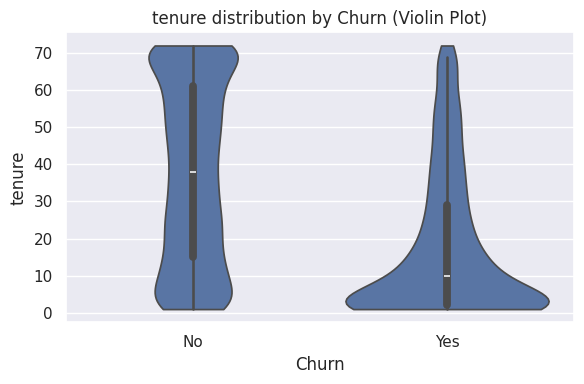

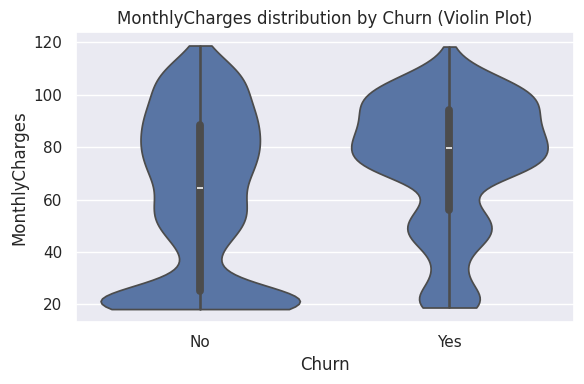

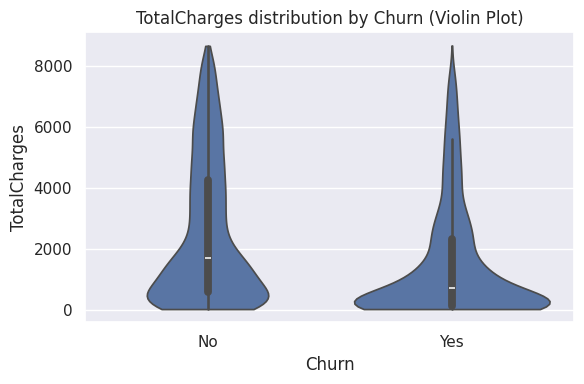

In [55]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=inputs, x="Churn", y=col, cut=0)
    plt.title(f"{col} distribution by Churn (Violin Plot)")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


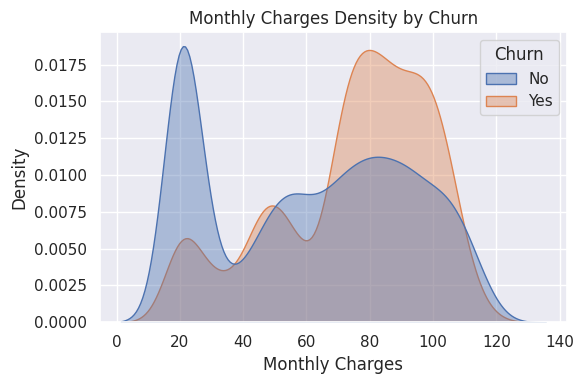

In [56]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=inputs, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False, alpha=0.4)
plt.title("Monthly Charges Density by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


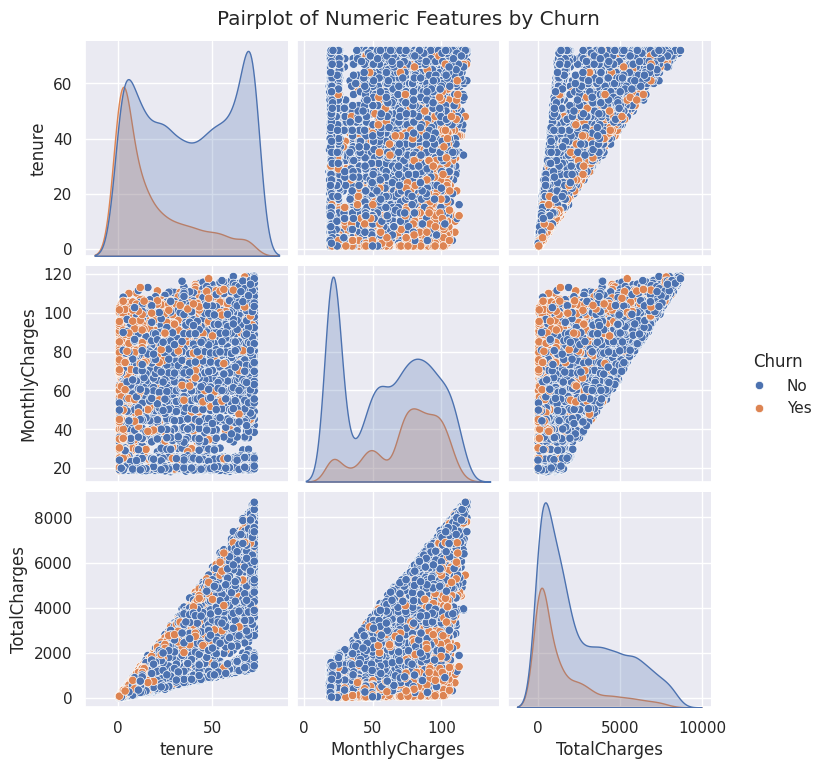

In [57]:
sns.pairplot(
    inputs[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]],
    hue="Churn",
    diag_kind="kde"
)
plt.suptitle("Pairplot of Numeric Features by Churn", y=1.02)
plt.show()


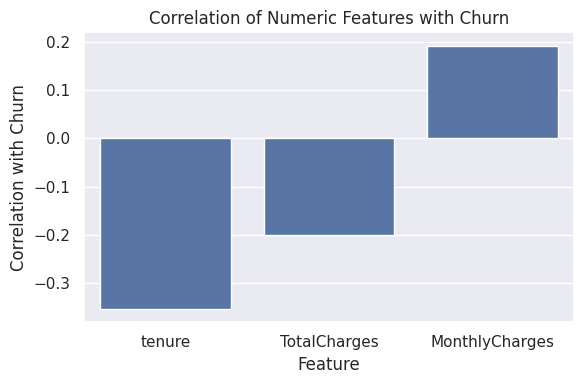

In [58]:
import numpy as np

# Encode churn
inputs_corr = inputs.copy()
inputs_corr["ChurnEncoded"] = inputs_corr["Churn"].map({"No": 0, "Yes": 1})

corr_vals = inputs_corr[["tenure", "MonthlyCharges", "TotalCharges", "ChurnEncoded"]].corr()["ChurnEncoded"].drop("ChurnEncoded")
corr_vals = corr_vals.sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=corr_vals.index, y=corr_vals.values)
plt.title("Correlation of Numeric Features with Churn")
plt.ylabel("Correlation with Churn")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Label encode target
inputs["Churn"] = inputs["Churn"].map({"No": 0, "Yes": 1})
